In [1]:
!rm new.db

import groundmeas as gm
import json
import os

# Path to the JSON file
path_dir = "measurements/"

gm.connect_db("new.db")

# iterate over all json files which end with _measurement.json
# and create a measurement in the database

all_files = os.listdir(path_dir)

all_measurements_files = [f for f in all_files if f.endswith("_measurement.json")]
all_items_files = [f for f in all_files if f.endswith("_items.json")]

for measurement_file in all_measurements_files:
    # read the json file
    with open(path_dir + measurement_file, "r") as f:
        data = json.load(f)
        # create a measurement in the database
        mid = gm.create_measurement(data)
       
        # get the items file name
        items_file = measurement_file.replace("_measurement.json", "_items.json")
        # check if the items file exists
        if items_file in all_items_files:
            # read the items file
            with open(path_dir + items_file, "r") as f:
                items_data = json.load(f)
                # create the items in the database
                for item in items_data.get("items", []):
                
                    iid = gm.create_item(item, mid)
                    print(f"Created item {iid} for measurement {mid}")
        else:
            print(f"Items file {items_file} not found for measurement {measurement_file}")






Created item 1 for measurement 1
Created item 2 for measurement 1
Created item 3 for measurement 1
Created item 4 for measurement 1
Created item 5 for measurement 1
Created item 6 for measurement 1
Created item 7 for measurement 2
Created item 8 for measurement 2
Created item 9 for measurement 2
Created item 10 for measurement 2
Created item 11 for measurement 2
Created item 12 for measurement 2
Created item 13 for measurement 2
Created item 14 for measurement 2
Created item 15 for measurement 2
Created item 16 for measurement 2
Created item 17 for measurement 2
Created item 18 for measurement 2
Created item 19 for measurement 2
Created item 20 for measurement 2
Created item 21 for measurement 3
Created item 22 for measurement 3
Created item 23 for measurement 3
Created item 24 for measurement 3
Created item 25 for measurement 3
Created item 26 for measurement 3
Created item 27 for measurement 3
Created item 28 for measurement 3
Created item 29 for measurement 3
Created item 30 for mea

In [2]:
import pandas as pd

out, mid = gm.read_measurements_by()

out_items, _ = gm.read_items_by(
    measurement_id__in=mid,
    measurement_type="soil_resistivity",
)

df = pd.DataFrame(out_items)

df.head(30)


,value,measurement_type,value_imag,unit,frequency_hz,input_impedance_ohm,measurement_id,value_real,id,value_angle_deg,description,additional_resistance_ohm,measurement_distance_m
0,25.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,2,None,20,None,None,0.0,4.0
1,18.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,27,None,None,0.0,2.0
2,23.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,28,None,None,0.0,4.0
3,181.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,29,None,None,0.0,10.0
4,68.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,30,None,None,0.0,15.0
5,121.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,31,None,None,0.0,22.0
6,127.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,3,None,32,None,None,0.0,30.0
7,48.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,4,None,55,None,None,0.0,5.0
8,21.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,5,None,74,None,None,0.0,5.0
9,28.0,soil_resistivity,None,Ohm_meter,50.0,500000.0,6,None,92,None,None,0.0,5.0


In [3]:
from groundmeas.analytics import impedance_over_frequency

impedance_over_frequency(mid)

{1: {50.0: 7.1, 15.0: 7.3, 100.0: 6.9},
 2: {50.0: 0.28, 15.0: 0.13, 100.0: 0.5, 150.0: 0.7, 200.0: 0.89, 250.0: 1.07},
 3: {50.0: 0.32,
  15.0: 0.14,
  100.0: 0.58,
  150.0: 0.84,
  200.0: 1.08,
  250.0: 1.33},
 4: {15.0: 0.344,
  50.0: 0.46,
  100.0: 0.63,
  150.0: 0.79,
  200.0: 0.95,
  250.0: 1.1,
  350.0: 1.34},
 5: {50.0: 0.23,
  15.0: 0.17,
  100.0: 0.334,
  150.0: 0.443,
  200.0: 0.542,
  250.0: 0.657,
  300.0: 0.762,
  350.0: 0.86},
 6: {15.0: 0.17,
  50.0: 0.26,
  100.0: 0.43,
  150.0: 0.6,
  200.0: 0.76,
  250.0: 0.84,
  350.0: 1.18}}

In [4]:
from groundmeas.analytics import real_imag_over_frequency

real_imag = real_imag_over_frequency(mid)
real_imag.get(1).get(50).get("real")

7.0956748718355795

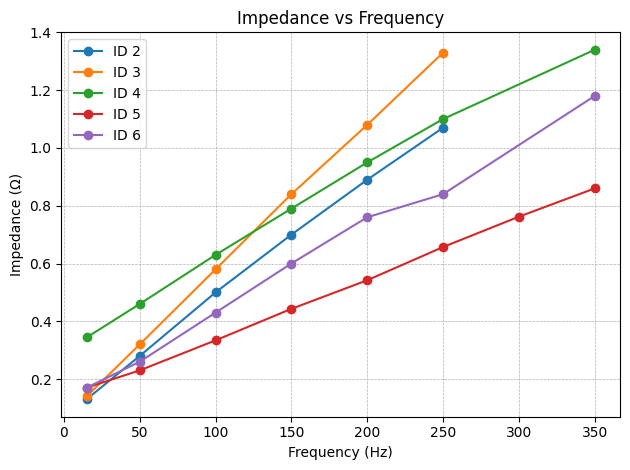

In [5]:
from groundmeas.plots import plot_imp_over_f

plot_imp_over_f([mid[1], mid[2], mid[3], mid[4], mid[5]], normalize_freq_hz=None);

In [6]:
from groundmeas.analytics import rho_f_model

rho_f = rho_f_model([mid[2],mid[3],mid[5]])
print(f"k1: {rho_f[0]}, k2: {rho_f[1]}, k3: {rho_f[2]},\nk4: {rho_f[3]}, k5: {rho_f[4]}, k6: {rho_f[5]}")

k1: 0.005537186134472345, k2: 0.0028917117639550745, k3: -0.000667714752280865,
k4: 0.005345299955054694, k5: 5.7023253320115263e-05, k6: -6.470281048716519e-05


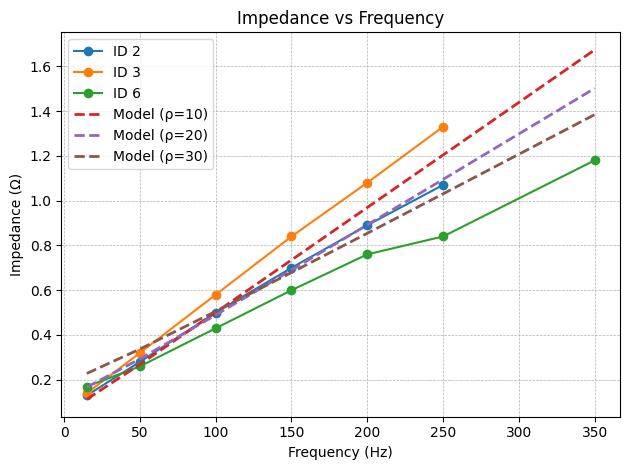

In [7]:
from groundmeas.plots import plot_rho_f_model

plot_rho_f_model(measurement_ids=[2,3,6], rho_f=rho_f, rho=[10,20,30]);


In [ ]:
# Test the CRUD operations 

# read the measurement
out, mid = gm.read_measurements_by()
print(out[0].get("voltage_level_kv"))

# update the measurement 
gm.update_measurement(mid[0], {"voltage_level_kv":10})
out, mid = gm.read_measurements_by(voltage_level_kv__lt=20)
print(out)

# delete the measurement
gm.delete_measurement(mid[0])
out, mid = gm.read_measurements_by(voltage_level_kv__lt=20)
print(out)

out, mid = gm.read_measurements_by()
print(out)



20.0
[{'id': 2, 'method': 'injection_remote_earth_electrode', 'asset_type': 'mv_lv_earthing_system', 'operator': 'Avacon Netz GmbH', 'location_id': 2, 'timestamp': datetime.datetime(2025, 5, 14, 18, 35, 1, 619644), 'voltage_level_kv': 10.0, 'fault_resistance_ohm': 0.0, 'description': 'Measurement of a village with 3 substations. Current injection in the lv cable cabinet.', 'items': [{'value': 0.28, 'measurement_type': 'earthing_impedance', 'value_imag': 0.24489351799903084, 'unit': 'Ohm', 'frequency_hz': 50.0, 'input_impedance_ohm': 500000.0, 'measurement_id': 2, 'value_real': 0.1357466936689744, 'id': 7, 'value_angle_deg': 61.0, 'description': None, 'additional_resistance_ohm': 0.0, 'measurement_distance_m': 140.0}, {'value': 0.13, 'measurement_type': 'earthing_impedance', 'value_imag': 0.07641208279802152, 'unit': 'Ohm', 'frequency_hz': 15.0, 'input_impedance_ohm': 500000.0, 'measurement_id': 2, 'value_real': 0.10517220926874317, 'id': 8, 'value_angle_deg': 36.0, 'description': None,

In [33]:
# update item 
#read the item
out_items, iid = gm.read_items_by(
    measurement_id__eq=2,
    measurement_type="soil_resistivity",
)
print(iid, out_items)

# update the item
gm.update_item(iid[0], {"value": 50})

out_items, iid = gm.read_items_by(
    measurement_id__eq=2,
    measurement_type="soil_resistivity",
)
print(iid, out_items)

# delete the item
gm.delete_item(iid[0])
out_items, iid = gm.read_items_by(
    measurement_id__eq=2,
    measurement_type="soil_resistivity",
)
print(iid, out_items)


[20] [{'value': 50.0, 'measurement_type': 'soil_resistivity', 'value_imag': None, 'unit': 'Ohm_meter', 'frequency_hz': 50.0, 'input_impedance_ohm': 500000.0, 'measurement_id': 2, 'value_real': None, 'id': 20, 'value_angle_deg': None, 'description': None, 'additional_resistance_ohm': 0.0, 'measurement_distance_m': 4.0}]
[20] [{'value': 50.0, 'measurement_type': 'soil_resistivity', 'value_imag': None, 'unit': 'Ohm_meter', 'frequency_hz': 50.0, 'input_impedance_ohm': 500000.0, 'measurement_id': 2, 'value_real': None, 'id': 20, 'value_angle_deg': None, 'description': None, 'additional_resistance_ohm': 0.0, 'measurement_distance_m': 4.0}]
[] []


In [2]:
# test the export 
import groundmeas.export as gme
import pandas as pd

# export the measurement
gme.export_measurements_to_csv(path="measurements.csv")
gme.export_measurements_to_json(path="measurements.json")
gme.export_measurements_to_xml(path="measurements.xml")
